In [7]:
import pandas as pd
import numpy as np
import time, datetime
import json
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from pandas_datareader import data as pdr
import yfinance as yf

yf.pdr_override()

In [8]:
f = open('symbols.json')
symbols = json.load(f)
rf_rate = 0.05 # Tasa libre de riesgo
symbols_ratio = []

In [3]:
twentythree_years_in_seconds = 725328000
now = time.time()
year_ago = now - twentythree_years_in_seconds
end_date = datetime.datetime.fromtimestamp(now)
start_date = datetime.datetime.fromtimestamp(year_ago)

In [18]:
df = pdr.get_data_yahoo("BRK.B", start=start_date, end=end_date)
print(df.info())

[*********************100%***********************]  1 of 1 completed

1 Failed download:
- BRK.B: No timezone found, symbol may be delisted
<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       0 non-null      float64
 1   High       0 non-null      float64
 2   Low        0 non-null      float64
 3   Close      0 non-null      float64
 4   Adj Close  0 non-null      float64
 5   Volume     0 non-null      float64
dtypes: float64(6)
memory usage: 0.0+ bytes
None


In [14]:
def daily_return(df):
  df['daily_return'] = df['Adj Close'].pct_change()
  """mean_daily_return = df['daily_return'].mean()
  std_daily_return = df['daily_return'].std() """
  # Calcular el rendimiento acumulado de la inversión
  cumulative_return = (df['Close'][-1] / df['Close'][0]) - 1
  # Calcular el número de años de la inversión
  df["Date"] = df.index
  years = (df['Date'][-1] - df['Date'][0]).days / 365
  # Calcular el rendimiento anualizado:
  annualized_return = (1 + cumulative_return) ** (1 / years) - 1
  return annualized_return

In [19]:
for sym in symbols["symbols"]:
  df = pdr.get_data_yahoo(sym, start=start_date, end=end_date)
  annualized_return = daily_return(df)
  item = [sym, annualized_return]
  symbols_ratio.append(item)
  print(f'Rendimiento Anualizado {sym}:', annualized_return)


[*********************100%***********************]  1 of 1 completed
Rendimiento Anualizado MMM: 0.036984962669422305
[*********************100%***********************]  1 of 1 completed
Rendimiento Anualizado AOS: 0.1460178294276384
[*********************100%***********************]  1 of 1 completed
Rendimiento Anualizado ABT: 0.08255837974459435
[*********************100%***********************]  1 of 1 completed
Rendimiento Anualizado ABBV: 0.15649334727557207
[*********************100%***********************]  1 of 1 completed
Rendimiento Anualizado ACN: 0.14227142344713095
[*********************100%***********************]  1 of 1 completed
Rendimiento Anualizado ATVI: 0.20499409594595375
[*********************100%***********************]  1 of 1 completed
Rendimiento Anualizado ADM: 0.09599477935126788
[*********************100%***********************]  1 of 1 completed
Rendimiento Anualizado ADBE: 0.11892610495118627
[*********************100%***********************]  1 of 1 co

IndexError: index -1 is out of bounds for axis 0 with size 0

In [16]:
symbols_ratio

[['MMM', 0.036984962669422305],
 ['AOS', 0.1460178294276384],
 ['ABT', 0.08255837974459435],
 ['ABBV', 0.15649334727557207],
 ['ACN', 0.14227142344713095],
 ['ATVI', 0.20499409594595375],
 ['ADM', 0.09599477935126788],
 ['ADBE', 0.11892610495118627],
 ['ADP', 0.07825437716931605],
 ['AAP', 0.10246592902149398],
 ['AES', -0.02321202100223263]]

In [15]:
#df.dropna(axis=0, inplace=True)

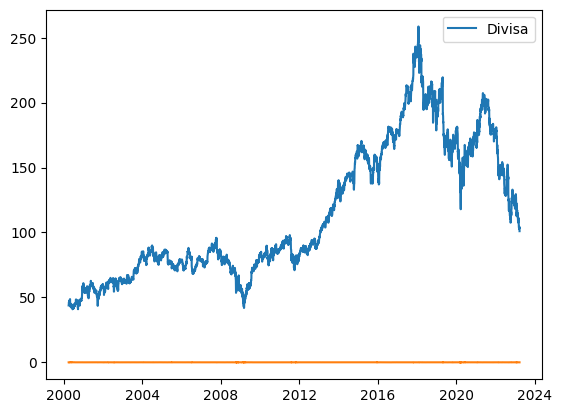

In [16]:
#plt.plot(df['Date'], df['Close'], label='Divisa')
#plt.legend()
#plt.show()

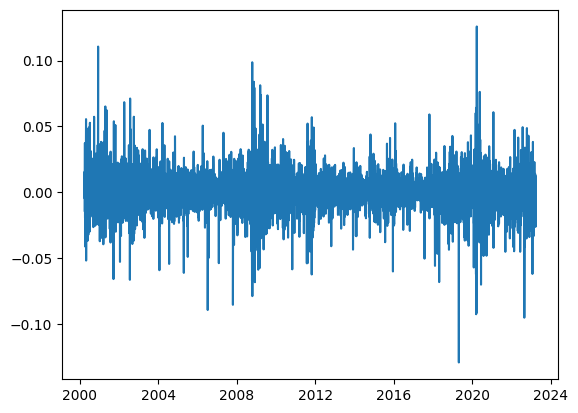

In [17]:
# plt.plot(df['Date'], df['Retorno Diario'])